In [1]:
import pandas as pd
from meBoot import MeBoot
from scipy.optimize import minimize
import numpy as np
import statsmodels.api as sm
from model import BootModel

In [2]:
df = pd.read_csv("/Users/erol/Projects/stocks/Data/test_dataset.csv")
df = df.loc[df['Symbol'] == 'AAPL',["Date","Close","ema50",'Volume','bol_up','bol_down']]
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date').reset_index().drop(columns=['Date','index'])
df

,Close,ema50,Volume,bol_up,bol_down
0,151.279999,0.028017,65463900.0,-0.022571,0.066952
1,150.440002,0.021704,55020900.0,-0.028404,0.056794
2,150.809998,0.023158,56787900.0,-0.023840,0.050901
3,147.919998,0.003914,65187100.0,-0.037106,0.020881
4,147.869995,0.003437,41000000.0,-0.033749,0.014063
...,...,...,...,...,...
116,162.880005,-0.029676,96046400.0,-0.111136,0.018368
117,156.800003,-0.066872,95623200.0,-0.156702,-0.005224
118,156.570007,-0.065756,88063200.0,-0.154162,0.003361
119,163.639999,-0.018937,130216800.0,-0.095915,0.046673


In [3]:
mod_obj = BootModel(df,["ema50",'Volume','bol_up','bol_down'],'Close',intercept=True)
aa = mod_obj.get_coef_dists()

Elapsed Time: [datetime.timedelta(microseconds=74415), datetime.timedelta(microseconds=2217), datetime.timedelta(microseconds=1045), datetime.timedelta(microseconds=102)]
Elapsed Time: [datetime.timedelta(microseconds=87425), datetime.timedelta(microseconds=1511), datetime.timedelta(microseconds=3217), datetime.timedelta(microseconds=315)]
Elapsed Time: [datetime.timedelta(microseconds=76084), datetime.timedelta(microseconds=604), datetime.timedelta(microseconds=408), datetime.timedelta(microseconds=86)]


/Users/erol/.pyenv/versions/3.9.12/envs/torch-metal/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:239: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


Elapsed Time: [datetime.timedelta(microseconds=112975), datetime.timedelta(microseconds=596), datetime.timedelta(microseconds=416), datetime.timedelta(microseconds=85)]


In [5]:
# ensemble = np.repeat(np.matrix(df.index.values), 10, axis=0)
# for p in ensemble:
#     print(len(np.array(p)[0]))
vol_coef = []
for c in aa:
    vol_coef.append(c[2])

In [6]:
import matplotlib.pyplot as plt

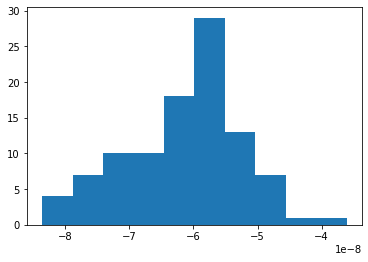

In [9]:
plt.hist(vol_coef, bins=10)
plt.show()

In [31]:
df['intercept'] = 1.0
Y = df['Close'].values
X = df[['intercept','ema50','Volume','bol_up','bol_down']].values

def objective(beta):
    return 0.5*np.sum((np.matmul(X,beta) - Y)**2), np.matmul(np.transpose(X),(np.matmul(X,beta) - Y))

def hessian(beta):
    return np.matmul(np.transpose(X), X)

beta = np.zeros(shape=(X.shape[1],),dtype=np.float32)
a, b = objective(beta)

In [32]:
opt_res = minimize(objective, x0=beta,method='trust-constr', jac=True, hess=hessian,options={'verbose':2,'xtol':1e-10})

| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  |
|-------|-------|-------|-------------|----------|----------|----------|
|   1   |   1   |   0   | +1.6933e+06 | 1.00e+00 | 1.92e+12 | 0.00e+00 |
|   2   |   2   |   1   | +1.2924e+05 | 1.00e+00 | 1.51e+03 | 0.00e+00 |
|   3   |   3   |   3   | +1.2773e+05 | 7.00e+00 | 1.17e+09 | 0.00e+00 |
|   4   |   4   |   4   | +1.2773e+05 | 7.00e+00 | 1.50e+03 | 0.00e+00 |
|   5   |   5   |   6   | +1.1742e+05 | 4.90e+01 | 1.16e+09 | 0.00e+00 |
|   6   |   6   |   7   | +1.1742e+05 | 4.90e+01 | 1.44e+03 | 0.00e+00 |
|   7   |   7   |   9   | +5.7772e+04 | 3.43e+02 | 7.81e+08 | 0.00e+00 |
|   8   |   8   |  10   | +5.7771e+04 | 3.43e+02 | 9.90e+02 | 0.00e+00 |
|   9   |   9   |  15   | +2.6025e+03 | 8.77e+02 | 9.03e+01 | 0.00e+00 |
|  10   |  10   |  20   | +1.9463e+03 | 1.14e+03 | 1.22e+01 | 0.00e+00 |
|  11   |  11   |  25   | +1.8276e+03 | 1.14e+03 | 9.81e-01 | 0.00e+00 |
|  12   |  12   |  30   | +1.8057e+03 | 1.14e+03 | 

In [33]:
opt_res.x

array([ 1.55997676e+02,  1.76812034e+02, -6.30689448e-08, -1.54648241e+02,
        5.88827281e+01])

In [34]:
model = sm.OLS(Y,X)
results = model.fit()
results.params

array([ 1.55997671e+02,  1.76812214e+02, -6.30689787e-08, -1.54648360e+02,
        5.88827003e+01])

In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     37.09
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           5.97e-20
Time:                        14:02:28   Log-Likelihood:                -376.99
No. Observations:                 121   AIC:                             764.0
Df Residuals:                     116   BIC:                             777.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        155.9977      2.260     69.036      0.000     151.522     160.473
x1           176.8122     25.387      6.965      0.000     126.530     227.095
x2         -6.307e-08   2.04e-08     -3.090      0.003   -1.03e-07   -2.26e-08
x3          -154.6484     23.479     -6.587      0.000    -201.152    -108.145
x4            58.8827     17.254      3.413      0.001      24.708      93.057
==============================================================================
Omnibus:                        6.991   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.153
Skew:                          -0.564   Prob(JB):                       0.0280
Kurtosis:                       2.618   Cond. No.                     6.31e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.31e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$$
f = Ar^{l-p-1}
$$

In [37]:
np.exp(np.log(0.001)/(20 - 5 -1))

0.6105402296585328